# IRIS FLOWER CLASSIFICATION

Iris flower classification is a very popular machine learning project. The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.


we will be dealing with two Machine Learning algorithms.
1. K-NEAREST NEIGHBOR (k-NN) 
2. Logistic Regression

## Dataset and Analysis

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
# Import IRIS Dataset

df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#  Some basic statistical analysis about the data
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: xlabel='Species', ylabel='count'>

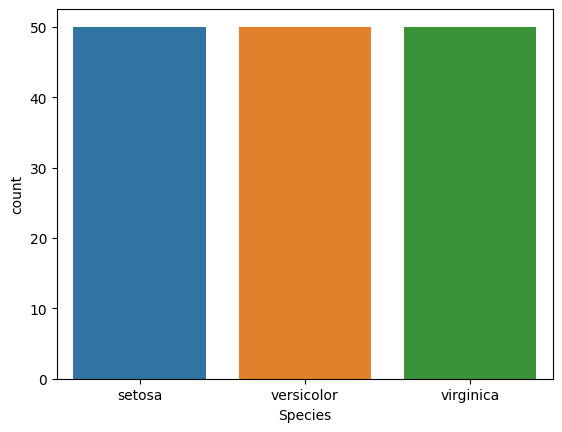

In [6]:
# countplot
sns.countplot(df["Species"])

We have 150 rows in which 50 belong to Iris-setosa, 50 belong to Iris-Versicolor, and the remaining 50 belong to Iris_virginica.

In [7]:
# Missing Values
df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

No Missing values are present in the data

In [8]:
# Duplicate Values
df.duplicated().sum()

1

In [9]:
# Removing Duplicates
df = df.drop_duplicates() 

# Duplicates are removed

###  Visualizations

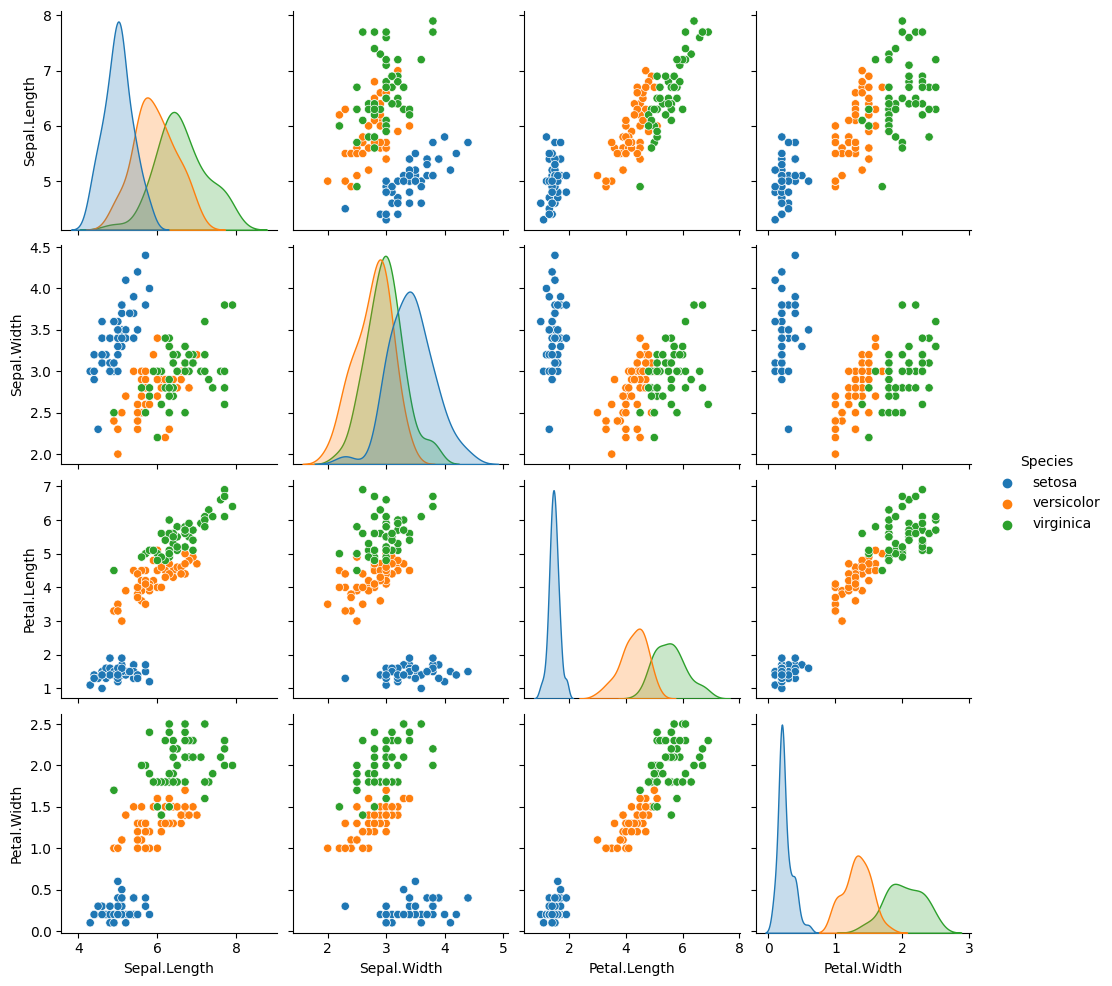

In [10]:
# Pair plot to visualize whole dataset
sns.pairplot(df, hue = 'Species')

1. From this visualization, we can tell that iris-setosa is well separated from the other two flowers.
2. Iris virginica is the longest flower and iris setosa is the shortest.

In [11]:
# Define Preedictors and Target Variables i.e. x and y

x = df.iloc[:,:4]

y = df.iloc[:,4]

In [12]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [14]:
# Splitting the data into Train test Split

# Importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [16]:
(x_train.shape), (x_test.shape)

((111, 4), (38, 4))

In [17]:
(y_train.shape), (y_test.shape)

((111,), (38,))

##  Creating the classification Models

## 1. k-NN 
KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point


In [18]:
# to figure out Optimal ’n’ neighbors for better accuracy and low error rates , we need to draw a graph between Error Rate vs K Value. Let’s draw this graph using Python
#feature Scaling  
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

st_x= StandardScaler()    
X_train= st_x.fit_transform(x_train)    
X_test= st_x.transform(x_test)


In [19]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.0 at K = 5


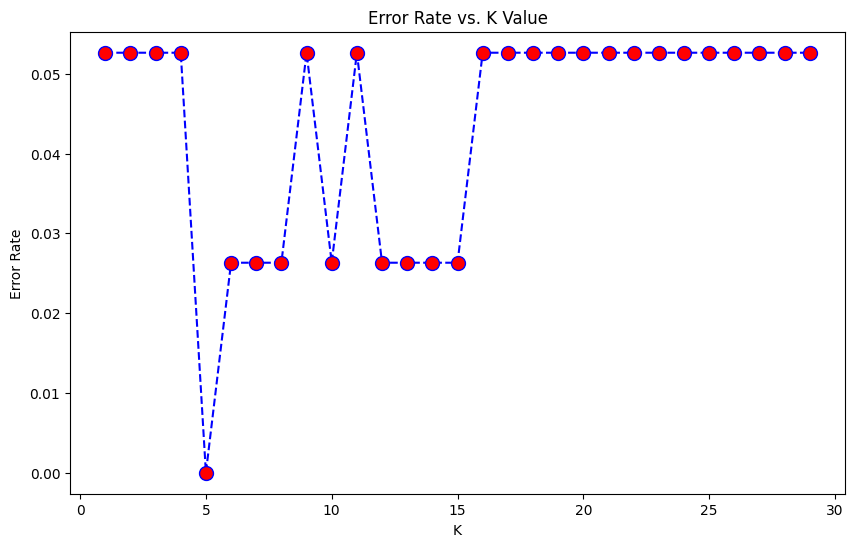

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

So for best accuracies we will take neighbors = 5 as Minimum error is (- 0.0 ) at K = 5

In [21]:
knn = KNeighborsClassifier(n_neighbors = req_k_value)    
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
# predict the results using predict method.

y_pred1 = knn.predict(x_test)
y_pred1

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor'], dtype=object)

In [23]:
# To Find the Accuracy of Model  and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
confusion_matrix(y_test,y_pred1)

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

In [25]:
accuracy=accuracy_score(y_test,y_pred1)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 100.00


## 2. Logistic Regression

Logistic Regression is a supervised machine learning model used mainly for categorical data, and it is a classification algorithm. It is one of the widely used algorithms for classification using machine learning.

In [26]:
# import LogisticRegression from the sci-kit learn library.
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred2 = model.predict(x_test)
y_pred2

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor'], dtype=object)

In [30]:
confusion_matrix(y_test,y_pred2)

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

In [31]:
accuracy=accuracy_score(y_test,y_pred2)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 100.00


In [32]:
#Classification report Based on Test Data
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Conclusion
1. We have Classified the flowers into their species. We have got 14 Sentosa, 14 versicolor and 10 Virginica species
2. We have used k-NN and logistic Regression Machine Learning Algorithms.
3. we got an accuracy of 100% for both the models , which shows that the models we built are very accurate.